# Home Credit Default Risk Jupyter notebook

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

In [62]:
app_train_df = pd.read_csv("application_train.csv")
app_train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
app_train_df.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [4]:
app_train_df["TARGET"].isnull().sum()

0

In [5]:
app_train_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [64]:
app_train_df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988


In [65]:
print("Training data shape:",app_train_df.shape)

Training data shape: (307511, 122)


In [66]:
app_test_df = pd.read_csv("application_test.csv")
print("Test data shape:", app_test_df.shape)

Test data shape: (48744, 121)


## 1. Exploratory Data Analysis (EDA)

### _1a. Target distribution_

In [67]:
app_train_df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

0: Paid back loan,
1: Had difficulty in paying back loan

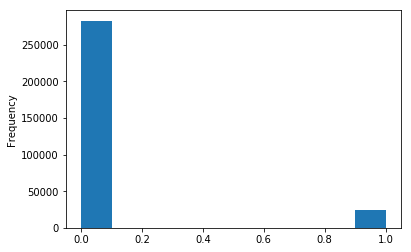

In [68]:
app_train_df["TARGET"].astype(int).plot.hist()

### _1b. Missing value distribution_

In [69]:
mis_value_total = app_train_df.isnull().sum()
mis_value_total_rearranged = mis_value_total[mis_value_total!= 0].sort_values(ascending = False)
mis_value_total_rearranged

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MODE       

### _1c. Label encoding for columns with two or less unique object types_

   ### _One hot encoding for columns above 2 unique object types_

In [70]:
l_e = LabelEncoder()
count = 0
for columns in app_train_df:
    if(app_train_df[columns].dtype == "object"):
        if(len(app_train_df[columns].unique())<=2):
            app_train_df[columns] = l_e.fit_transform(app_train_df[columns])
            app_test_df[columns] = l_e.transform(app_test_df[columns])
            count +=1
print(count)

3


In [71]:
app_train_df = pd.get_dummies(app_train_df)
app_test_df = pd.get_dummies(app_test_df)

In [72]:
# New Shape
print("Train Shape:", app_train_df.shape)
print("Test Shape:", app_test_df.shape)

Train Shape: (307511, 243)
Test Shape: (48744, 239)


### _1d. Aligning the training columns based on testing columns to have same number of columns except for "Target" column in training_

In [73]:
train_labels = app_train_df["TARGET"]
app_train_df, app_test_df = app_train_df.align(app_test_df, join= "inner", axis =1)
print(app_train_df.shape)
app_train_df["TARGET"] = train_labels
print(app_train_df.shape)

(307511, 239)
(307511, 240)


### _1e. Anamolies_

In [74]:
(app_train_df["DAYS_BIRTH"]/-360).describe()

count    307511.000000
mean         44.547209
std          12.122191
min          20.802778
25%          34.480556
50%          43.750000
75%          54.672222
max          70.080556
Name: DAYS_BIRTH, dtype: float64

In [75]:
(app_train_df["DAYS_EMPLOYED"]/-1).describe()

count    307511.000000
mean     -63815.045904
std      141275.766519
min     -365243.000000
25%         289.000000
50%        1213.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

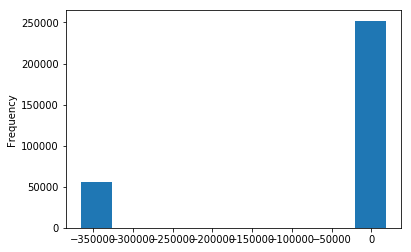

In [76]:
(app_train_df["DAYS_EMPLOYED"]/-1).astype(int).plot.hist()

In [77]:
# No. of anamolis in the DAYS_EMPLOYED
(app_train_df["DAYS_EMPLOYED"]==365243).value_counts()

False    252137
True      55374
Name: DAYS_EMPLOYED, dtype: int64

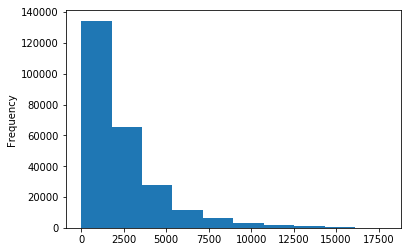

In [78]:
app_train_df["DAYS_EMPLOYED_ANOMALY"] = (app_train_df["DAYS_EMPLOYED"] == 365243)
app_train_df["DAYS_EMPLOYED"].replace({365243:np.nan}, inplace = True)
(app_train_df["DAYS_EMPLOYED"]/-1).plot.hist()

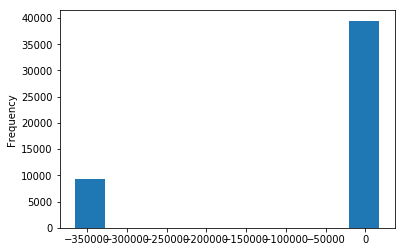

In [79]:
(app_test_df["DAYS_EMPLOYED"]/-1).astype(int).plot.hist()

In [80]:
(app_test_df["DAYS_EMPLOYED"]).describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [81]:
(app_test_df["DAYS_EMPLOYED"]==365243).value_counts()

False    39470
True      9274
Name: DAYS_EMPLOYED, dtype: int64

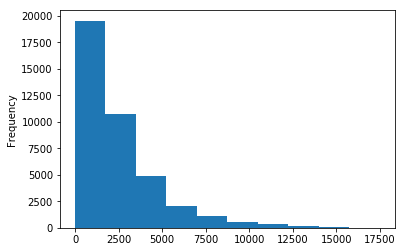

In [82]:
app_test_df["DAYS_EMPLOYED_ANOMALY"] = app_test_df["DAYS_EMPLOYED"]==365243
app_test_df.replace({365243:np.nan}, inplace = True)
(app_test_df["DAYS_EMPLOYED"]/-1).plot.hist()

### _1f. Most significant correlations with the TARGET_

In [83]:
correlation_target = app_train_df.corr()["TARGET"]
correlation_target_sorted = correlation_target.sort_values()
print(correlation_target_sorted.head())
print(correlation_target_sorted.tail())

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
Name: TARGET, dtype: float64
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


Since DAYS_EMPLOYED and DAYS_BIRTH are negative values, they are negatively correlated with TARGET values i.e., More DAYS_EMPLOYED/DAYS_BIRTH, less chance of loan defaulting

### _1g. Distribution and Correlation plot_

Text(0,0.5,'Density')

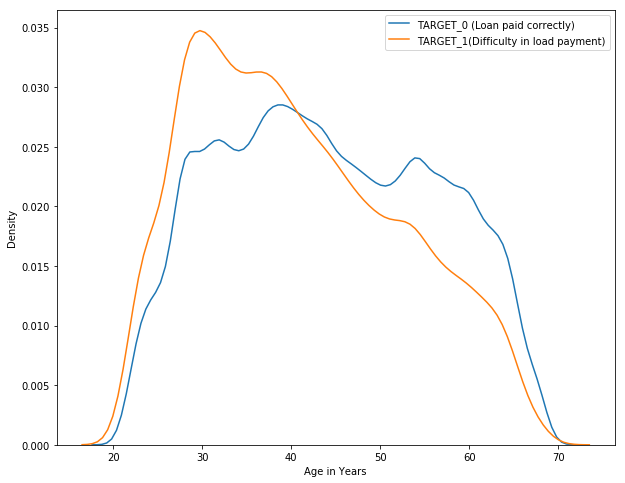

In [84]:
app_train_df["DAYS_BIRTH"] = abs(app_train_df["DAYS_BIRTH"])
app_test_df["DAYS_BIRTH"] = abs(app_test_df["DAYS_BIRTH"])
app_train_df["DAYS_EMPLOYED"] = abs(app_train_df["DAYS_EMPLOYED"])
app_test_df["DAYS_EMPLOYED"] = abs(app_test_df["DAYS_EMPLOYED"])
plt.figure(figsize=(10,8))
sns.kdeplot(app_train_df.loc[app_train_df["TARGET"]==0, "DAYS_BIRTH"]/365, label = "TARGET_0 (Loan paid correctly)")
sns.kdeplot(app_train_df.loc[app_train_df["TARGET"]==1, "DAYS_BIRTH"]/365, label = "TARGET_1(Difficulty in load payment)")
plt.xlabel("Age in Years")
plt.ylabel("Density")

Text(0,0.5,'Density')

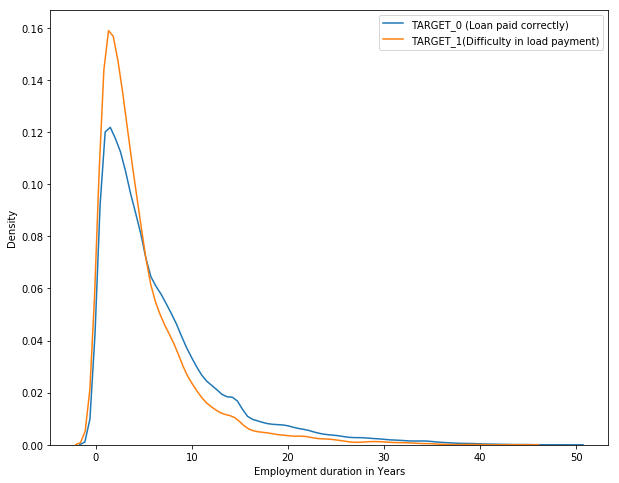

In [85]:
plt.figure(figsize=(10,8))
app_train_df_kde = app_train_df.dropna(subset =["DAYS_EMPLOYED"])
sns.kdeplot(app_train_df_kde.loc[app_train_df_kde["TARGET"]==0, "DAYS_EMPLOYED"]/365, label = "TARGET_0 (Loan paid correctly)")
sns.kdeplot(app_train_df_kde.loc[app_train_df_kde["TARGET"]==1, "DAYS_EMPLOYED"]/365, label = "TARGET_1(Difficulty in load payment)")
plt.xlabel("Employment duration in Years")
plt.ylabel("Density")

In [86]:
age_data = app_train_df[["TARGET", "DAYS_BIRTH"]]
age_data["AGE_YEARS"] = age_data["DAYS_BIRTH"]/365
age_data["YEARS_BIN"] = pd.cut(age_data["AGE_YEARS"], bins = np.linspace(20,70, num=11))
age_data.head()

/home/sudhanshu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sudhanshu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TARGET,DAYS_BIRTH,AGE_YEARS,YEARS_BIN
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [33]:
age_groups = age_data.groupby(age_data["YEARS_BIN"]).mean()
age_groups

,TARGET,DAYS_BIRTH,AGE_YEARS
YEARS_BIN,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0,0.5,'FRACTION UNABLE TO PAY')

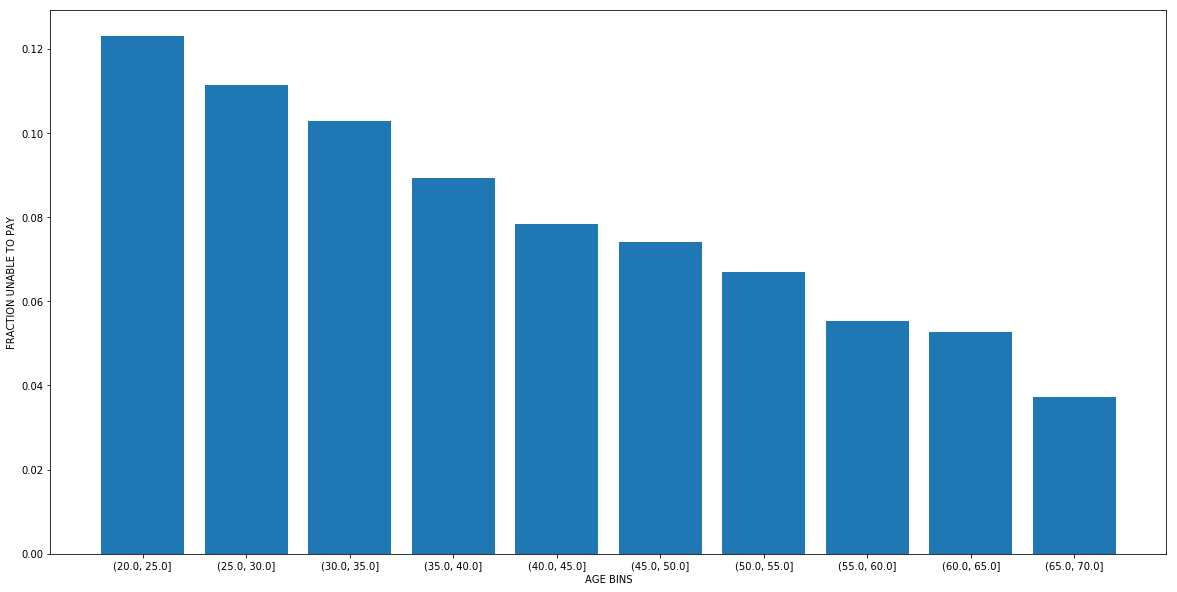

In [87]:
plt.figure(figsize=(20,10))
plt.bar(age_groups.index.astype(str), age_groups["TARGET"])
plt.xlabel("AGE BINS")
plt.ylabel("FRACTION UNABLE TO PAY")

Text(0.5,1,'Ext source correlation heat map')

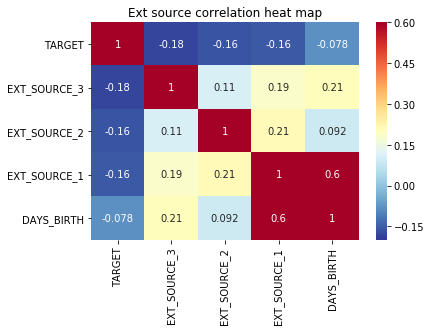

In [88]:
app_train_ext_data = app_train_df[["TARGET", "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "DAYS_BIRTH"]]
app_train_ext_corr = app_train_ext_data.corr()
sns.heatmap(app_train_ext_corr, cmap = plt.cm.RdYlBu_r, vmin=-0.2, vmax=0.6, annot = True)
plt.title("Ext source correlation heat map")

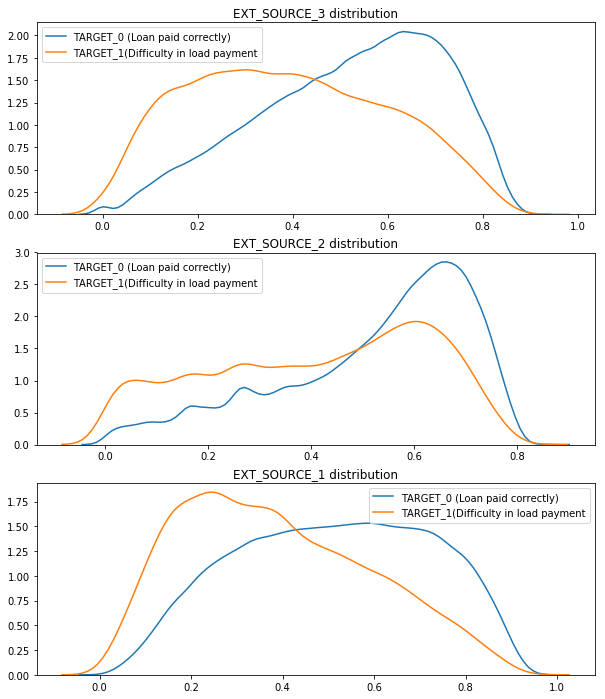

In [89]:
app_train_ext = app_train_df[["EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1"]]
plt.figure(figsize = (10, 12))
for i,source in enumerate(app_train_ext):
    plt.subplot(3,1,i+1)
    app_train_df_kde = app_train_df.dropna(subset =[source])
    sns.kdeplot(app_train_df_kde.loc[app_train_df_kde["TARGET"]==0, source], label= "TARGET_0 (Loan paid correctly)")
    sns.kdeplot(app_train_df_kde.loc[app_train_df_kde["TARGET"]==1, source], label= "TARGET_1(Difficulty in load payment")
    plt.title("%s distribution" %source)

## 2. Feature Engineering

### 2a. Polynomial Feature

In [90]:
app_train_ext_poly = app_train_df[["EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "DAYS_BIRTH"]]
app_test_ext_poly = app_test_df[["EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "DAYS_BIRTH"]]
impute = Imputer(strategy = "median")
app_train_ext_poly = impute.fit_transform(app_train_ext_poly)
app_test_ext_poly = impute.transform(app_test_ext_poly)

In [91]:
polyTransform = PolynomialFeatures(degree = 3)
app_train_ext_poly = polyTransform.fit_transform(app_train_ext_poly)
app_test_ext_poly = polyTransform.transform(app_test_ext_poly)

In [92]:
print(app_train_ext_poly.shape)
print(app_test_ext_poly.shape)

(307511, 35)
(48744, 35)


In [93]:
input_feat = ["EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "DAYS_BIRTH"]
polyTransform.get_feature_names(input_features = input_feat)

['1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 EXT_SOURCE_2',
 'EXT_SOURCE_3 EXT_SOURCE_1',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 EXT_SOURCE_2',
 'EXT_SOURCE_3^2 EXT_SOURCE_1',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2^2',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_1^2',
 'EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_1^2',
 'EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [94]:
app_train_ext_poly_df = pd.DataFrame(app_train_ext_poly, columns = polyTransform.get_feature_names(input_features = input_feat))
app_train_ext_poly_df["TARGET"] = app_train_df["TARGET"]
app_train_ext_poly_corr = app_train_ext_poly_df.corr()["TARGET"].sort_values()
print(app_train_ext_poly_corr.head())
print(app_train_ext_poly_corr.tail())

EXT_SOURCE_3 EXT_SOURCE_2                -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1   -0.189605
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH     -0.181283
EXT_SOURCE_3 EXT_SOURCE_2^2              -0.176428
EXT_SOURCE_3^2 EXT_SOURCE_2              -0.172282
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [95]:
app_test_ext_poly_df = pd.DataFrame(app_test_ext_poly)

In [96]:
app_train_ext_poly_df["SK_ID_CURR"] = app_train_df["SK_ID_CURR"]
app_train_poly_df = app_train_df.merge(app_train_ext_poly_df, on = "SK_ID_CURR")
app_test_ext_poly_df["SK_ID_CURR"] = app_test_df["SK_ID_CURR"]
app_test_poly_df = app_test_df.merge(app_test_ext_poly_df, on = "SK_ID_CURR")

In [97]:
print(app_train_poly_df.shape)
print(app_test_poly_df.shape)

(307511, 277)
(48744, 275)


In [98]:
#Align features
app_train_poly_df, app_test_poly_df = app_train_poly_df.align(app_test_poly_df, join= "inner", axis = 1)
app_train_poly_df["TARGET"] = app_train_df["TARGET"]
print(app_train_poly_df.shape)
print(app_test_poly_df.shape)

(307511, 237)
(48744, 236)


## 2b. Domain features

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [99]:
app_train_domain_df = app_train_df.copy()
app_test_domain_df = app_test_df.copy()

app_train_domain_df["CREDIT_INCOME_PERCENT"] = app_train_domain_df["AMT_CREDIT"] / app_train_domain_df["AMT_INCOME_TOTAL"]
app_train_domain_df["ANNUITY_INCOME_PERCENT"] = app_train_domain_df["AMT_ANNUITY"] / app_train_domain_df["AMT_INCOME_TOTAL"]
app_train_domain_df["CREDIT_TERM"] = app_train_domain_df["AMT_ANNUITY"] / app_train_domain_df["AMT_CREDIT"]
app_train_domain_df["DAYS_EMPLOYED_PERCENT"] = app_train_domain_df["DAYS_EMPLOYED"] / app_train_domain_df["DAYS_BIRTH"]

app_test_domain_df["CREDIT_INCOME_PERCENT"] = app_test_domain_df["AMT_CREDIT"] / app_test_domain_df["AMT_INCOME_TOTAL"]
app_test_domain_df["ANNUITY_INCOME_PERCENT"] = app_test_domain_df["AMT_ANNUITY"] / app_test_domain_df["AMT_INCOME_TOTAL"]
app_test_domain_df["CREDIT_TERM"] = app_test_domain_df["AMT_ANNUITY"] / app_test_domain_df["AMT_CREDIT"]
app_test_domain_df["DAYS_EMPLOYED_PERCENT"] = app_test_domain_df["DAYS_EMPLOYED"] / app_test_domain_df["DAYS_BIRTH"]

## 3. Prediction

### 3a. Impute and Scale

#### Base Features

In [100]:
app_train_feat_df = app_train_df.drop(columns =["TARGET"])
app_train_label = app_train_df["TARGET"]
features = list(app_train_feat_df.columns)

Impute = Imputer(strategy = "median")
app_train_impute_scale = Impute.fit_transform(app_train_feat_df)
app_test_impute_scale = Impute.transform(app_test_df)

MinMaxScale = MinMaxScaler(feature_range=(0,1))
app_train_impute_scale = MinMaxScale.fit_transform(app_train_impute_scale)
app_test_impute_scale = MinMaxScale.transform(app_test_impute_scale)
print(app_train_impute_scale.shape)
print(app_test_impute_scale.shape)

(307511, 240)
(48744, 240)


#### Polynomial Features

In [101]:
app_train_poly_feat_df = app_train_poly_df.drop(columns =["TARGET"])

Impute = Imputer(strategy = "median")
app_train_poly_impute_scale = Impute.fit_transform(app_train_poly_feat_df)
app_test_poly_impute_scale = Impute.transform(app_test_poly_df)

MinMaxScale = MinMaxScaler(feature_range=(0,1))
app_train_poly_impute_scale = MinMaxScale.fit_transform(app_train_poly_impute_scale)
app_test_poly_impute_scale = MinMaxScale.transform(app_test_poly_impute_scale)
print(app_train_poly_impute_scale.shape)
print(app_test_poly_impute_scale.shape)

(307511, 236)
(48744, 236)


#### Domain Features

In [102]:
app_train_domain_feat_df = app_train_domain_df.drop(columns =["TARGET"])

Impute = Imputer(strategy = "median")
app_train_domain_impute_scale = Impute.fit_transform(app_train_domain_feat_df)
app_test_domain_impute_scale = Impute.transform(app_test_domain_df)

MinMaxScale = MinMaxScaler(feature_range=(0,1))
app_train_domain_impute_scale = MinMaxScale.fit_transform(app_train_domain_impute_scale)
app_test_domain_impute_scale = MinMaxScale.transform(app_test_domain_impute_scale)
print(app_train_domain_impute_scale.shape)
print(app_test_domain_impute_scale.shape)

(307511, 244)
(48744, 244)


### 3b. Logistic Regression Prediction and Submission

#### Base Features

In [103]:
LogReg= LogisticRegression()
LogReg.fit(app_train_impute_scale,app_train_label)
app_test_label_LogReg_pred = LogReg.predict_proba(app_test_impute_scale)[:, 1]

In [104]:
print(len(app_test_df[["SK_ID_CURR"]]))
print(len(app_test_label_LogReg_pred))

48744
48744


In [105]:
Submission_LogReg = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_LogReg["TARGET"] = app_test_label_LogReg_pred
Submission_LogReg.head()

,SK_ID_CURR,TARGET
0,100001,0.058389
1,100005,0.216077
2,100013,0.040996
3,100028,0.034600
4,100038,0.121271


In [106]:
Submission_LogReg.to_csv("Submission_LogReg_BaseFeatures", index = False)
# ROC Accuracy 0.737

#### Polynomial Features

In [107]:
LogReg.fit(app_train_poly_impute_scale,app_train_label)
app_test_poly_label_LogReg_pred = LogReg.predict_proba(app_test_poly_impute_scale)[:, 1]
print(len(app_test_df[["SK_ID_CURR"]]))
print(len(app_test_poly_label_LogReg_pred))
Submission_poly_LogReg = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_poly_LogReg["TARGET"] = app_test_poly_label_LogReg_pred
Submission_poly_LogReg.head()
Submission_poly_LogReg.to_csv("Submission_LogReg_PolyFeatures", index = False)
# ROC Accuracy 0.740

48744
48744


#### Domain Features

In [109]:
LogReg.fit(app_train_domain_impute_scale,app_train_label)
app_test_domain_label_LogReg_pred = LogReg.predict_proba(app_test_domain_impute_scale)[:, 1]
print(len(app_test_df[["SK_ID_CURR"]]))
print(len(app_test_domain_label_LogReg_pred))
Submission_domain_LogReg = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_domain_LogReg["TARGET"] = app_test_domain_label_LogReg_pred
Submission_domain_LogReg.head()
Submission_domain_LogReg.to_csv("Submission_LogReg_DomainFeatures", index = False)
# ROC Accuracy 0.738

48744
48744


### 3c. Random Forest Prediction and Submission

#### Base Features

In [110]:
RandomForest = RandomForestClassifier(n_estimators= 100)
RandomForest.fit(app_train_impute_scale, app_train_label)
app_test_label_RF_pred = RandomForest.predict_proba(app_test_impute_scale)[:,1]

KeyboardInterrupt: 

In [ ]:
Submission_RF = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_RF["TARGET"] = app_test_label_RF_pred
Submission_RF.head()

In [ ]:
Submission_RF.to_csv("Submission_RF_BaseFeatures", index = False)
# ROC Accuracy 0.689

In [ ]:
feature_importance_val = RandomForest.feature_importances_
feature_importance = pd.DataFrame({"Base Feature": features, "importance":feature_importance_val})
feature_importance = feature_importance.sort_values('importance',ascending = False)
feature_importance.head(10)

#### Polynomial Features

In [ ]:
features = list(app_train_poly_feat_df.columns)
RandomForest.fit(app_train_poly_impute_scale, app_train_label)
app_test_label_poly_RF_pred = RandomForest.predict_proba(app_test_poly_impute_scale)[:,1]
Submission_poly_RF = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_poly_RF["TARGET"] = app_test_label_poly_RF_pred
Submission_poly_RF.head()
Submission_poly_RF.to_csv("Submission_RF_PolyFeatures", index = False)
feature_importance_val = RandomForest.feature_importances_
feature_importance = pd.DataFrame({"Poly Feature": features, "importance":feature_importance_val})
feature_importance = feature_importance.sort_values('importance',ascending = False)
feature_importance.head(10)
# ROC Accuracy 0.683

#### Domain Features

In [111]:
features = list(app_train_domain_feat_df.columns)
RandomForest.fit(app_train_domain_impute_scale, app_train_label)
app_test_label_domain_RF_pred = RandomForest.predict_proba(app_test_domain_impute_scale)[:,1]
Submission_domain_RF = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_domain_RF["TARGET"] = app_test_label_domain_RF_pred
Submission_domain_RF.head()
Submission_domain_RF.to_csv("Submission_RF_DomainFeatures", index = False)
feature_importance_val = RandomForest.feature_importances_
feature_importance = pd.DataFrame({"Domain Feature": features, "importance":feature_importance_val})
feature_importance = feature_importance.sort_values('importance',ascending = False)
feature_importance.head(10)

KeyboardInterrupt: 

#### 3d. Gradient Boost Prediction and Submission

In [112]:
model_lgbm = lgb.LGBMClassifier(n_estimator = 10000)

#### Base Features

In [ ]:
model_lgbm.fit(app_train_impute_scale, app_train_label)
best_iteration = model_lgbm.best_iteration_
app_test_label_LGBM_pred = model_lgbm.predict_proba(app_test_impute_scale)[:,1]

In [ ]:
Submission_LGBM = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_LGBM["TARGET"] = app_test_label_LGBM_pred
Submission_LGBM.head()
Submission_LGBM.to_csv("Submission_LGBM_BaseFeatures", index = False)
# ROC Accuracy 0.740

In [ ]:
features = list(app_train_feat_df.columns)
feature_importance_val = model_lgbm.feature_importances_
feature_importance = pd.DataFrame({"Base Feature": features, "importance":feature_importance_val})
feature_importance = feature_importance.sort_values('importance',ascending = False)
feature_importance.head(10)

#### Polynomial Features

In [ ]:
features = list(app_train_poly_feat_df.columns)
model_lgbm.fit(app_train_poly_impute_scale, app_train_label)
app_test_label_poly_LGBM_pred = model_lgbm.predict_proba(app_test_poly_impute_scale)[:,1]
Submission_poly_LGBM = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_poly_LGBM["TARGET"] = app_test_label_poly_RF_pred
Submission_poly_LGBM.head()
Submission_poly_LGBM.to_csv("Submission_LGBM_PolyFeatures", index = False)
feature_importance_val = model_lgbm.feature_importances_
feature_importance = pd.DataFrame({"Poly Feature": features, "importance":feature_importance_val})
feature_importance = feature_importance.sort_values('importance',ascending = False)
feature_importance.head(10)
# ROC Accuracy 0.626

#### Domain Features

In [ ]:
features = list(app_train_domain_feat_df.columns)
model_lgbm.fit(app_train_domain_impute_scale, app_train_label)
app_test_label_domain_LGBM_pred = model_lgbm.predict_proba(app_test_domain_impute_scale)[:,1]
Submission_domain_LGBM = app_test_df[["SK_ID_CURR"]].astype(int)
Submission_domain_LGBM["TARGET"] = app_test_label_domain_RF_pred
Submission_domain_LGBM.head()
Submission_domain_LGBM.to_csv("Submission_LGBM_DomainFeatures", index = False)
feature_importance_val = model_lgbm.feature_importances_
feature_importance = pd.DataFrame({"Domain Feature": features, "importance":feature_importance_val})
feature_importance = feature_importance.sort_values('importance',ascending = False)
feature_importance.head(10)